In [19]:
import numpy as np
import rubin_sim.moving_objects as mo
import pandas as pd
import sqlite3

import matplotlib.pylab as plt
%matplotlib inline

from rubin_scheduler.utils import healbin
import healpy as hp

In [2]:
orbit_info = {}


In [3]:
filename = "baseline_v5.0.1_10yrs.db"
run_name = filename.replace(".db", "")
con = sqlite3.connect(filename)
df = pd.read_sql("select * from observations where night < 30;", con)
con.close()

pointing_array = df.to_records(index=False)

orbit_info["run_name"] = run_name
orbit_info["subset"] = "night < 30"
orbit_info["mjd_start"] = pointing_array["observationStartMJD"].min()

In [4]:
orbit_file = "/Users/yoachim/rubin_sim_data/orbits/granvik_5k.txt"
positions_file = "/Users/yoachim/rubin_sim_data/orbits_precompute/granvik_5k.npz"

orbits = mo.Orbits()
orbits.read_orbits(orbit_file)

orbit_info["orbit_name"] = "granvik_5k"
orbit_info["n_objects"] = orbits.orbits.shape[0]

In [5]:
# read in the positions pre-computed
position_data = np.load(positions_file)
object_positions = position_data["positions"].copy()
object_mjds = position_data["mjds"].copy()
position_data.close()

In [6]:
d_obs = mo.DirectObs()

In [7]:
object_observations = d_obs.run(
        orbits,
        pointing_array,
        object_positions=object_positions,
        object_mjds=object_mjds,
    )

In [8]:
object_observations

array([(   8, 1265, 'S.dat', 24.8747463, 60990.24063204, 12.12624838, -29.07241352, -0.21739321, 0.04988532, 16.95205744, 123.02363846, 2.84715435, 2.18382962, 29.74481884, 220.4296918 , 0.22304338,  0.38406676, 0.01716389, 0.01206877, 30., 23.78636537, 1.20467751, 60990.24063204,  9, 'g'),
       (   8, 1317, 'S.dat', 24.8747463, 60990.26422031, 12.12039292, -29.07123253, -0.21651337, 0.05023981, 16.95719965, 123.00264874, 2.84697895, 2.18389846, 29.74492275, 220.43287461, 0.22226578, -0.2613188 , 0.02195532, 0.01594569, 30., 23.53306963, 1.04246677, 60990.26422031,  9, 'r'),
       (   8, 1831, 'S.dat', 24.8747463, 60991.14453512, 11.90789293, -29.02751513, -0.21523137, 0.05321378, 17.14800673, 122.21818259, 2.84042494, 2.18636446, 29.74863922, 220.55193677, 0.22171209, -0.2613188 , 0.04004284, 0.03208308, 30., 24.55599348, 0.7275066 , 60991.14453512, 10, 'r'),
       ...,
       (4999, 6931, 'S.dat', 24.5422077, 61002.0533566 , 19.62352391,  -0.09614587, -0.21575612, 0.04792755, 22.

In [12]:
# what is the data I need to carry along here? 
orbit_info

{'run_name': 'baseline_v5.0.1_10yrs',
 'subset': 'night < 30',
 'mjd_start': np.float64(60981.00225242024),
 'orbit_name': 'granvik_5k',
 'n_objects': 5000}

In [ ]:
# ok, I think that's a handy way to package the info. 

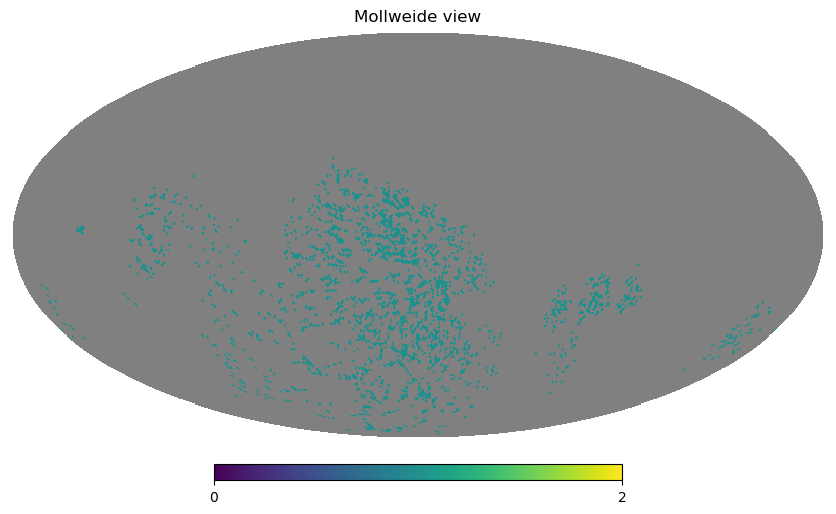

In [20]:
# Plot where the objects were seen on the sky
im = healbin(object_observations["ra"], object_observations["dec"],object_observations["ra"]*0+1, 64 )
hp.mollview(im)

In [ ]:
# now I suspect we'll want to do some groupby on obj_id.

# Ah, there are stackers to call first. But maybe not. 

In [21]:
object_df = pd.DataFrame(object_observations)

In [22]:
object_df

,obj_id,observationId,sedname,H,time,ra,dec,dradt,ddecdt,phase,...,velocity,dmag_color,dmag_trail,dmag_detect,visitExposureTime,fiveSigmaDepth,seeingFwhmGeom,observationStartMJD,night,band
0,8,1265,S.dat,24.874746,60990.240632,12.126248,-29.072414,-0.217393,0.049885,16.952057,...,0.223043,0.384067,0.017164,0.012069,30.0,23.786365,1.204678,60990.240632,9,g
1,8,1317,S.dat,24.874746,60990.264220,12.120393,-29.071233,-0.216513,0.050240,16.957200,...,0.222266,-0.261319,0.021955,0.015946,30.0,23.533070,1.042467,60990.264220,9,r
2,8,1831,S.dat,24.874746,60991.144535,11.907893,-29.027515,-0.215231,0.053214,17.148007,...,0.221712,-0.261319,0.040043,0.032083,30.0,24.555993,0.727507,60991.144535,10,r
3,8,2556,S.dat,24.874746,60992.248935,11.646151,-28.966546,-0.207234,0.060369,17.385371,...,0.215848,0.384067,0.037571,0.029748,30.0,24.790383,0.736353,60992.248935,11,g
4,8,2608,S.dat,24.874746,60992.272457,11.640592,-28.965122,-0.206310,0.060682,17.390388,...,0.215049,-0.261319,0.019103,0.013616,30.0,23.658941,1.092725,60992.272457,11,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7354,4999,6069,S.dat,24.542208,61000.125017,20.037569,-0.180329,-0.243487,0.039323,21.515029,...,0.246642,0.384067,0.072898,0.066599,30.0,25.206525,0.552583,61000.125017,19,g
7355,4999,6206,S.dat,24.542208,61000.193209,20.021079,-0.177638,-0.239655,0.039640,21.548734,...,0.242911,0.384067,0.042684,0.034621,30.0,24.722369,0.766372,61000.193209,19,g
7356,4999,6931,S.dat,24.542208,61002.053357,19.623524,-0.096146,-0.215756,0.047928,22.420264,...,0.221015,1.815138,0.053821,0.045796,38.0,23.777253,0.763891,61002.053357,21,u
7357,4999,6973,S.dat,24.542208,61002.075120,19.618828,-0.095102,-0.215631,0.048021,22.430463,...,0.220913,0.384067,0.034684,0.027070,30.0,24.788469,0.791035,61002.075120,21,g
